In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
data = pd.read_csv('/content/Merged_Dataset_Type2.csv')

# Fill missing values
data['Percentage of Type 2 Diabieties in Male'].fillna(data['Percentage of Type 2 Diabieties in Male'].median(), inplace=True)
data['Percentage of Type 2 Diabeties in Female'].fillna(data['Percentage of Type 2 Diabeties in Female'].median(), inplace=True)
data['Male Type 2 Diabeties'].fillna(data['Male Type 2 Diabeties'].median(), inplace=True)
data['Female Type 2 Diabeties'].fillna(data['Female Type 2 Diabeties'].median(), inplace=True)
data['Type 2 Diabieties Registrations (number)'].fillna(data['Type 2 Diabieties Registrations (number)'].median(), inplace=True)


# Define the columns for positive targets achieved and the corresponding total tests
positive_columns = [
    "HbA1c Target Achieved", "Blood Pressure Target Achieved", "Cholesterol Target Achieved",
    "Serum Creatinine Target Achieved", "Urine Albumin Target Achieved", "Foot Surveillance Target Achieved",
    "BMI Target Achieved", "Smoking", "All Eight Care Processes Target Achieved"
]

total_test_columns = [
    "Total HbA1c Tests", "Total Blood Pressure Tests", "Total Cholesterol Tests",
    "Total Serum Creatinine Tests", "Total Urine Albumin Test", "Total Foot Surveillance Tests",
    "Total BMI Tests", "Total Tests for Smoking", "Total All Eight Care Processes"
]

# Calculate the sum of positives and the sum of total tests
data['Sum of Positives'] = data[positive_columns].sum(axis=1)
data['Sum of Total Tests'] = data[total_test_columns].sum(axis=1)

# Calculate the Diabetes Prevalence Ratio
data['Diabetes Prevalence Ratio'] = data['Sum of Positives'] / data['Sum of Total Tests']

# Display the first few rows to confirm creation of the new column
print(data[['Sum of Positives', 'Sum of Total Tests', 'Diabetes Prevalence Ratio']].head())

# Define the features and the target
selected_features = ['HbA1c Target Achieved', 'Total HbA1c Tests',
    'Blood Pressure Target Achieved', 'Total Blood Pressure Tests',
    'Cholesterol Target Achieved', 'Total Cholesterol Tests',
    'Serum Creatinine Target Achieved', 'Total Serum Creatinine Tests',
    'Urine Albumin Target Achieved', 'Total Urine Albumin Test',
    'Foot Surveillance Target Achieved', 'Total Foot Surveillance Tests',
    'BMI Target Achieved', 'Total BMI Tests',
    'Smoking', 'Total Tests for Smoking','Percentage of Type 2 Diabieties in Male', 'Percentage of Type 2 Diabeties in Female', 'All Eight Care Processes Target Achieved']
X = data[selected_features]
y = data['Diabetes Prevalence Ratio']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_lr_pred = model_lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_lr_pred))
print("Linear Regression R2:", r2_score(y_test, y_lr_pred))

# Decision Tree
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_dt_pred = model_dt.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(y_test, y_dt_pred))
print("Decision Tree R2:", r2_score(y_test, y_dt_pred))

# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)
y_rf_pred = model_rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_rf_pred))
print("Random Forest R2:", r2_score(y_test, y_rf_pred))


   Sum of Positives  Sum of Total Tests  Diabetes Prevalence Ratio
0            792360              956910                   0.828040
1            667155              792815                   0.841501
2            359565              424180                   0.847671
3            475490              594990                   0.799156
4            472300              567565                   0.832151
Linear Regression MSE: 0.006942337506656041
Linear Regression R2: 0.04716141497666726
Decision Tree MSE: 0.0006118696310953
Decision Tree R2: 0.916020649679935
Random Forest MSE: 0.000533821904621218
Random Forest R2: 0.9267327311923295


In [3]:
print("\nType II Descriptive Statistics:")
data.describe()


Type II Descriptive Statistics:


,HbA1c Target Achieved,Total HbA1c Tests,Blood Pressure Target Achieved,Total Blood Pressure Tests,Cholesterol Target Achieved,Total Cholesterol Tests,Serum Creatinine Target Achieved,Total Serum Creatinine Tests,Urine Albumin Target Achieved,Total Urine Albumin Test,...,"HbA1c, Blood Pressure, and Cholesterol Target Achieved",All three treatment targets Total Tests,Type 2 Diabieties Registrations (number),Percentage of Type 2 Diabieties in Male,Percentage of Type 2 Diabeties in Female,Male Type 2 Diabeties,Female Type 2 Diabeties,Sum of Positives,Sum of Total Tests,Diabetes Prevalence Ratio
count,64039.000000,64039.000000,64039.000000,64039.000000,64039.000000,64039.000000,64039.000000,64039.000000,64039.000000,64039.000000,...,64039.000000,64039.000000,64039.000000,64039.000000,64039.000000,64039.000000,64039.000000,6.403900e+04,6.403900e+04,64039.000000
mean,833.345555,895.592311,831.708115,894.038586,800.060166,894.038586,828.582832,894.038586,584.197630,894.038586,...,309.587236,791.484361,852.728384,56.289774,43.797357,475.284257,377.436263,6.637565e+03,8.049455e+03,0.824960
std,3682.279799,4009.896915,3660.508734,4005.882539,3517.538322,4005.882539,3678.103348,4005.882539,2602.380523,4005.882539,...,1337.982465,3481.059993,3958.207796,4.447409,4.485698,2193.796923,1765.847075,2.942499e+04,3.606093e+04,0.085576
min,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.800000e+01,0.111111
25%,230.000000,245.000000,230.000000,245.000000,220.000000,245.000000,228.000000,245.000000,145.000000,245.000000,...,85.000000,216.000000,245.000000,53.800000,41.509434,140.000000,105.000000,1.805000e+03,2.205000e+03,0.780803
50%,370.000000,395.000000,370.000000,395.000000,355.000000,395.000000,365.000000,395.000000,255.000000,395.000000,...,135.000000,350.000000,395.000000,56.100000,43.900000,220.000000,175.000000,2.921000e+03,3.555000e+03,0.841808
75%,565.000000,605.000000,561.000000,604.000000,540.000000,604.000000,560.000000,604.000000,410.000000,604.000000,...,213.000000,535.000000,595.000000,58.500000,46.200000,330.000000,265.000000,4.500000e+03,5.436000e+03,0.885908
max,187200.000000,197385.000000,186815.000000,197340.000000,178850.000000,197340.000000,187060.000000,197340.000000,133815.000000,197340.000000,...,70605.000000,181225.000000,197385.000000,100.000000,100.000000,109746.060000,87638.940000,1.505385e+06,1.776150e+06,1.000000


In [4]:
#Checking missing values
print('Data')
print(data.isnull().sum())

Data
Audit Year                                                0
Organisation Code                                         0
HbA1c Target Achieved                                     0
Total HbA1c Tests                                         0
Blood Pressure Target Achieved                            0
Total Blood Pressure Tests                                0
Cholesterol Target Achieved                               0
Total Cholesterol Tests                                   0
Serum Creatinine Target Achieved                          0
Total Serum Creatinine Tests                              0
Urine Albumin Target Achieved                             0
Total Urine Albumin Test                                  0
Foot Surveillance Target Achieved                         0
Total Foot Surveillance Tests                             0
BMI Target Achieved                                       0
Total BMI Tests                                           0
Smoking                            

In [ ]:
#Code for Hyperparameter Tuning for Random Forest Model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist, n_iter=10, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best score: -0.00027216018222576786


In [5]:
#Code for Cross-Validation for Random Forest Model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with best parameters from grid search
model_rf = RandomForestRegressor(n_estimators=150, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation results
print("CV scores:", cv_scores)
print("CV scores mean:", cv_scores.mean())

CV scores: [0.97054017 0.96752043 0.96292825 0.96626715 0.96137442]
CV scores mean: 0.9657260820187211


In [6]:
#Code for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate the model
y_gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_gb_pred)
gb_r2 = r2_score(y_test, y_gb_pred)

print("Gradient Boosting MSE:", gb_mse)
print("Gradient Boosting R2:", gb_r2)

Gradient Boosting MSE: 0.0009360726840738294
Gradient Boosting R2: 0.8715236516639018


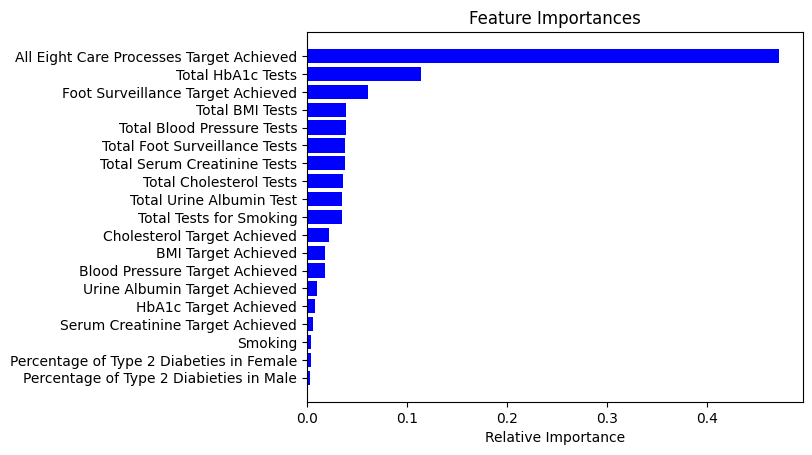

In [7]:
#Code for Feature Importance
# Fit the Random Forest model
model_rf.fit(X_train, y_train)

# Get feature importances
importances = model_rf.feature_importances_

# Plot feature importances
features = X_train.columns
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [8]:
#Run both the Random Forest and Gradient Boosting models on a separate test set that was not used during training.
# Predict on the test set with Random Forest
y_rf_test_pred = model_rf.predict(X_test)
mse_rf_test = mean_squared_error(y_test, y_rf_test_pred)
r2_rf_test = r2_score(y_test, y_rf_test_pred)

# Predict on the test set with Gradient Boosting
y_gb_test_pred = gb_model.predict(X_test)
mse_gb_test = mean_squared_error(y_test, y_gb_test_pred)
r2_gb_test = r2_score(y_test, y_gb_test_pred)

# Output the test set metrics
print("Random Forest Test MSE:", mse_rf_test)
print("Random Forest Test R2:", r2_rf_test)
print("Gradient Boosting Test MSE:", mse_gb_test)
print("Gradient Boosting Test R2:", r2_gb_test)

Random Forest Test MSE: 0.00020831279032130346
Random Forest Test R2: 0.9714089866443817
Gradient Boosting Test MSE: 0.0009360726840738294
Gradient Boosting Test R2: 0.8715236516639018


In [ ]:
#Implement k-fold cross-validation to verify model stability across different data splits
from sklearn.model_selection import cross_val_score

# Evaluate Random Forest with k-fold cross-validation
cv_scores_rf = cross_val_score(model_rf, X, y, cv=5, scoring='r2')

# Evaluate Gradient Boosting with k-fold cross-validation
cv_scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='r2')

# Output the cross-validation metrics
print("Random Forest CV R2 scores:", cv_scores_rf)
print("Gradient Boosting CV R2 scores:", cv_scores_gb)


Random Forest CV R2 scores: [0.96853609 0.93741505 0.96303891 0.94920311 0.92440695]
Gradient Boosting CV R2 scores: [0.8312623  0.79160148 0.80373566 0.83262917 0.84199271]


In [ ]:
#Model Tuning for Gradient Boosting
from sklearn.model_selection import GridSearchCV

# Define a new parameter grid
param_grid_gb = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'max_depth': [3, 5, 7]
}

# Initialize the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                              param_grid=param_grid_gb, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_gb.fit(X_train, y_train)

# Output the best parameters and score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best score for Gradient Boosting: -0.00015122868326668674


In [9]:
#Validate the Gradient Boosting Model with the Best Parameters
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model with the best parameters from the tuning
gb_best_model = GradientBoostingRegressor(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# Fit the model on the training data
gb_best_model.fit(X_train, y_train)

# Predict on the test data
y_gb_best_pred = gb_best_model.predict(X_test)

# Calculate MSE and R² for the test data predictions
mse_gb_best = mean_squared_error(y_test, y_gb_best_pred)
r2_gb_best = r2_score(y_test, y_gb_best_pred)

print("Gradient Boosting Test MSE:", mse_gb_best)
print("Gradient Boosting Test R2:", r2_gb_best)


Gradient Boosting Test MSE: 0.00012136324260799116
Gradient Boosting Test R2: 0.9833428466637395


In [10]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
cv_scores_gb_best = cross_val_score(
    gb_best_model,
    X,
    y,
    cv=5,
    scoring='r2'
)

print("Gradient Boosting CV R2 scores:", cv_scores_gb_best)
print("Gradient Boosting CV R2 mean:", cv_scores_gb_best.mean())


Gradient Boosting CV R2 scores: [0.97661603 0.9777305  0.98084551 0.97441573 0.93658505]
Gradient Boosting CV R2 mean: 0.9692385638896605


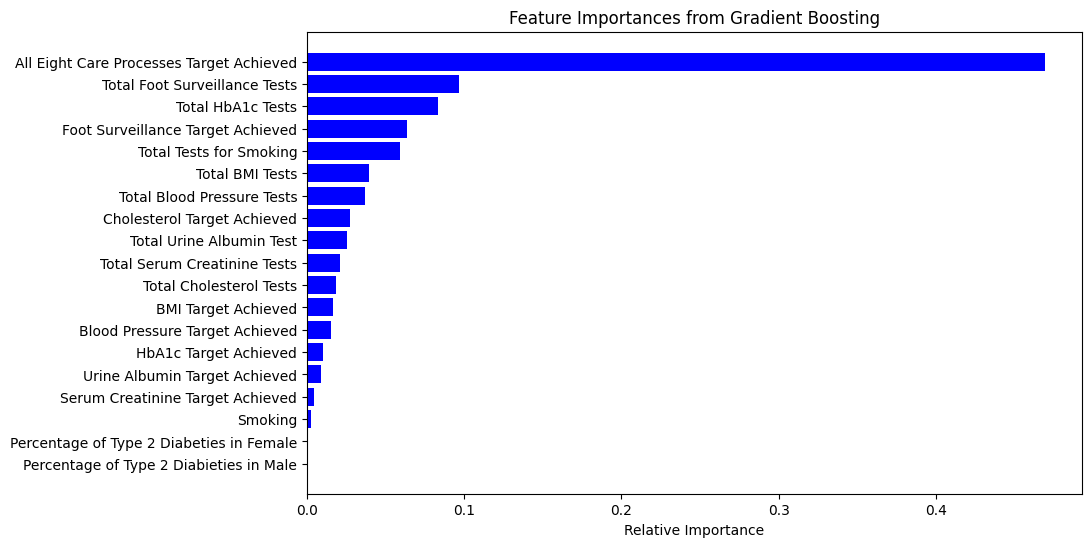

In [11]:
# Fit the model to analyze feature importances
gb_best_model.fit(X, y)

# Get feature importances and plot them
importances_gb = gb_best_model.feature_importances_
indices_gb = np.argsort(importances_gb)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances from Gradient Boosting')
plt.barh(range(len(indices_gb)), importances_gb[indices_gb], color='b', align='center')
plt.yticks(range(len(indices_gb)), [X.columns[i] for i in indices_gb])
plt.xlabel('Relative Importance')
plt.show()


In [12]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.0 MB/s eta 0:00:00


In [13]:
import shap
shap.initjs

<function shap.plots._force.initjs()>

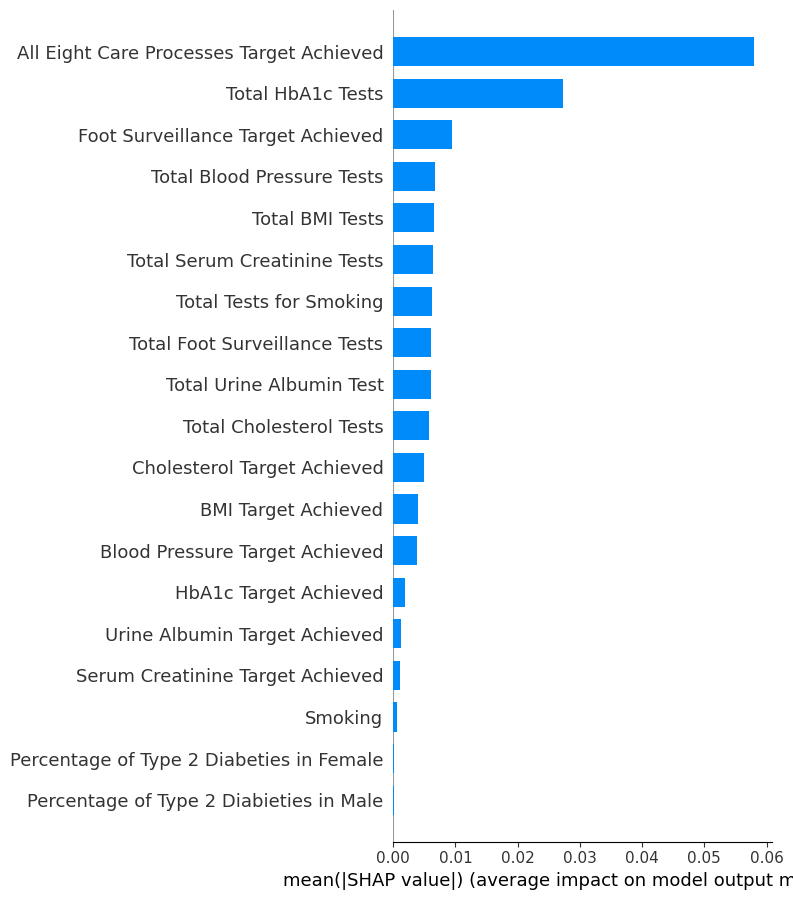

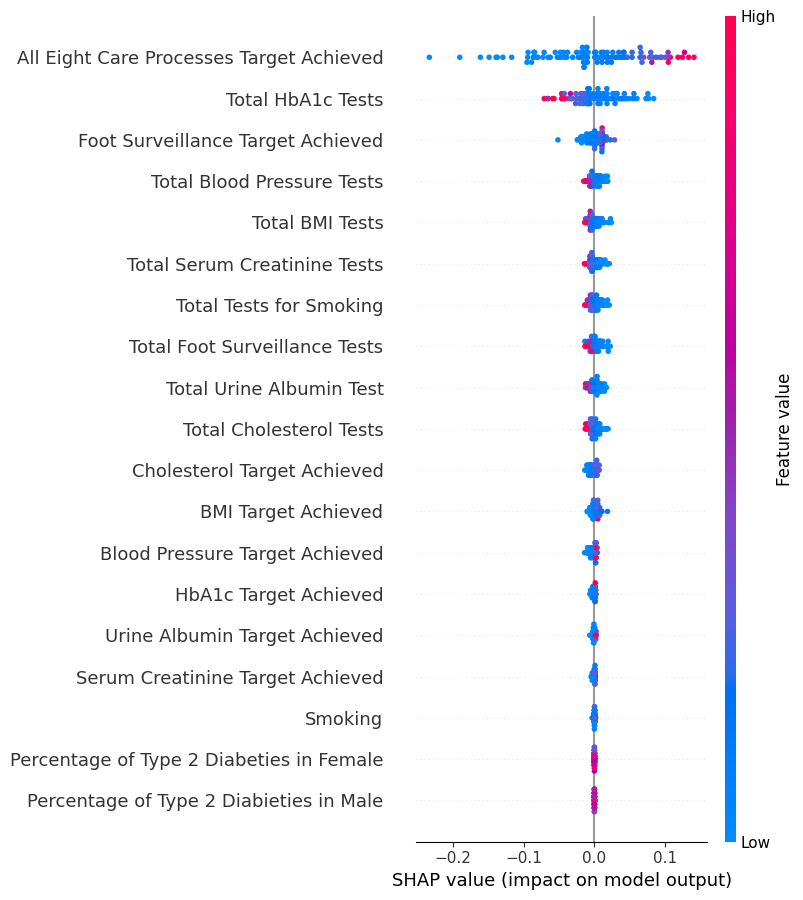

In [14]:
import shap

# Sample data for SHAP value computation to reduce computation load
X_sample = X_test.sample(100, random_state=42)  # Adjust the sample size based on your computational capacity

# Create a SHAP explainer object using TreeExplainer and the RandomForest model
explainer_rf = shap.TreeExplainer(model_rf)

# Compute SHAP values (this might take some time depending on the model complexity and sample size)
shap_values_rf = explainer_rf.shap_values(X_sample)

# Plot SHAP values for feature importance visualization
shap.summary_plot(shap_values_rf, X_sample, plot_type="bar")

# Alternatively, for more detailed visualization use a beeswarm plot
shap.summary_plot(shap_values_rf, X_sample)

# For individual prediction explanations, you can use a force plot for a selected instance
instance_index = 0  # Change the index based on which instance you want to explain
shap.force_plot(explainer_rf.expected_value, shap_values_rf[instance_index], X_sample.iloc[instance_index])

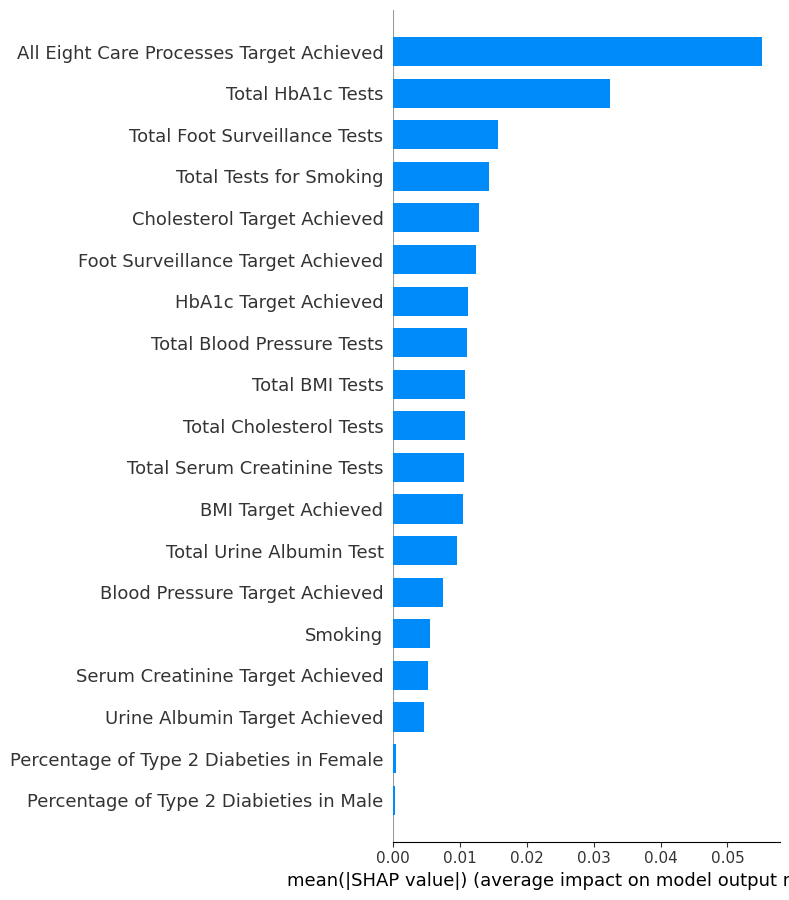

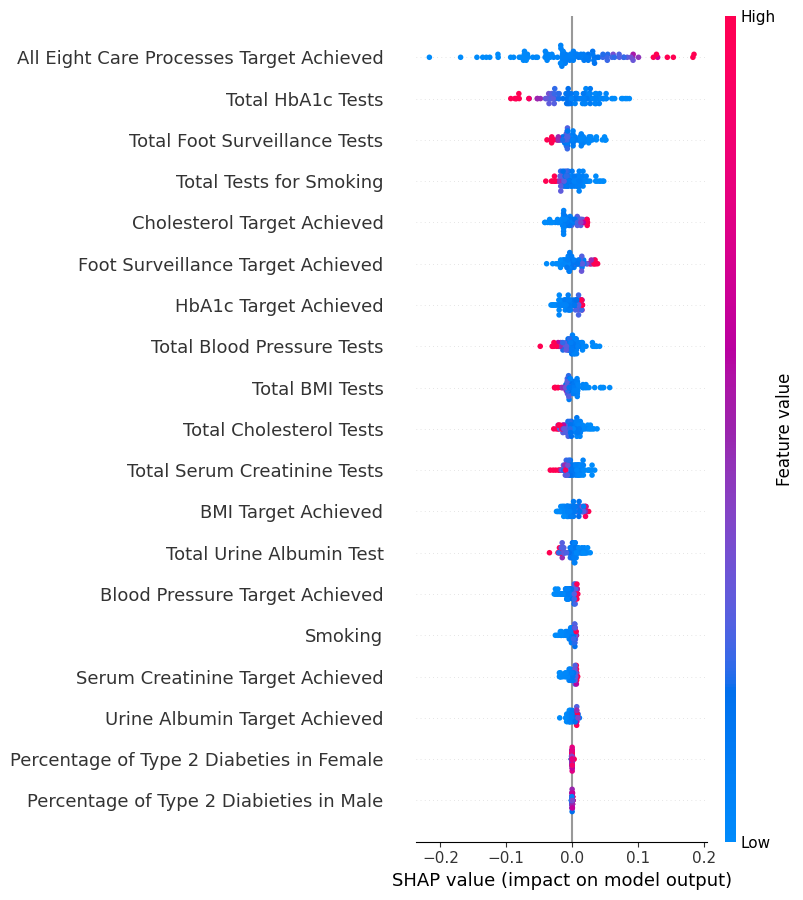

In [15]:
# Create a SHAP explainer object for the Gradient Boosting model
gb_explainer = shap.Explainer(gb_best_model)

# Calculate SHAP values for a sample of the test set to reduce computation time
X_sample = X_test.sample(100, random_state=42)  # Or whatever sample size is feasible
shap_values_gb = gb_explainer.shap_values(X_sample)

# Summary plot for the SHAP values
shap.summary_plot(shap_values_gb, X_sample, plot_type="bar")

# If you want to use the beeswarm plot which provides more detail:
shap.summary_plot(shap_values_gb, X_sample)

In [16]:
# Predict using the Random Forest model
rf_predictions = model_rf.predict(X_test)

# Predict using the Gradient Boosting model
gb_predictions = gb_best_model.predict(X_test)

# Now you can compare these predictions to the true values from 'y_test'
# Calculate the absolute errors for example
rf_errors = abs(rf_predictions - y_test)
gb_errors = abs(gb_predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error of Random Forest:', round(np.mean(rf_errors), 2))
print('Mean Absolute Error of Gradient Boosting:', round(np.mean(gb_errors), 2))

Mean Absolute Error of Random Forest: 0.01
Mean Absolute Error of Gradient Boosting: 0.0


In [17]:
# Print actual vs predicted values for a subset of the test data
for i in range(5):
    print(f"Actual value: {y_test.iloc[i]} - RF predicted: {rf_predictions[i]}, GB predicted: {gb_predictions[i]}")


Actual value: 0.7691477885652643 - RF predicted: 0.7715932775275838, GB predicted: 0.7724556109477138
Actual value: 0.7580498866213152 - RF predicted: 0.76859085153452, GB predicted: 0.7666774471464887
Actual value: 0.806522940851299 - RF predicted: 0.7811764614916072, GB predicted: 0.8009284609996188
Actual value: 0.9037037037037037 - RF predicted: 0.9057187388662722, GB predicted: 0.9017367026766784
Actual value: 0.9100261878039656 - RF predicted: 0.8956934875524627, GB predicted: 0.9099415073142708


In [18]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, rf_predictions)
mae_gb = mean_absolute_error(y_test, gb_predictions)

# Calculate Root Mean Squared Error (RMSE) from MSE
rmse_rf = np.sqrt(mse_rf_test)
rmse_gb = np.sqrt(mse_gb_best)

print("Random Forest - MAE: ", mae_rf, " RMSE: ", rmse_rf)
print("Gradient Boosting - MAE: ", mae_gb, " RMSE: ", rmse_gb)


Random Forest - MAE:  0.009279765915062205  RMSE:  0.014433045081385406
Gradient Boosting - MAE:  0.004456091027155167  RMSE:  0.011016498654653898


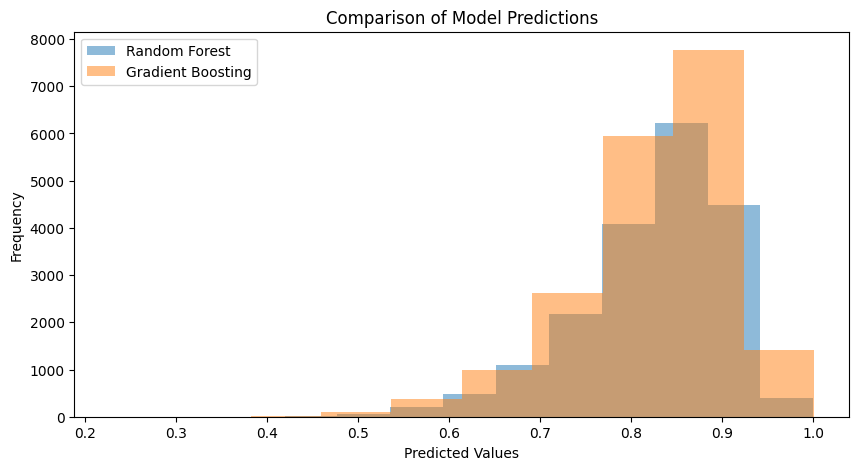

In [19]:
# Predict using the Random Forest and Gradient Boosting model

rf_predictions1 = model_rf.predict(X_test)
gb_predictions1 = gb_best_model.predict(X_test)

# Create a DataFrame to compare predictions
predictions_df = pd.DataFrame({
    'RF Predictions': rf_predictions1,
    'GB Predictions': gb_predictions1
})

# Plotting predictions
plt.figure(figsize=(10, 5))
plt.hist(predictions_df['RF Predictions'], alpha=0.5, label='Random Forest')
plt.hist(predictions_df['GB Predictions'], alpha=0.5, label='Gradient Boosting')
plt.title('Comparison of Model Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, RMSE, and R2 for Random Forest predictions
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)  # squared=False returns RMSE
rf_r2 = r2_score(y_test, rf_predictions)

# Calculate MAE, RMSE, and R2 for Gradient Boosting predictions
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
gb_r2 = r2_score(y_test, gb_predictions)

print("Random Forest - MAE:", rf_mae, "RMSE:", rf_rmse, "R²:", rf_r2)
print("Gradient Boosting - MAE:", gb_mae, "RMSE:", gb_rmse, "R²:", gb_r2)


Random Forest - MAE: 0.009279765915062205 RMSE: 0.014433045081385406 R²: 0.9714089866443817
Gradient Boosting - MAE: 0.004456091027155167 RMSE: 0.0057722625534197426 R²: 0.9954269519361709


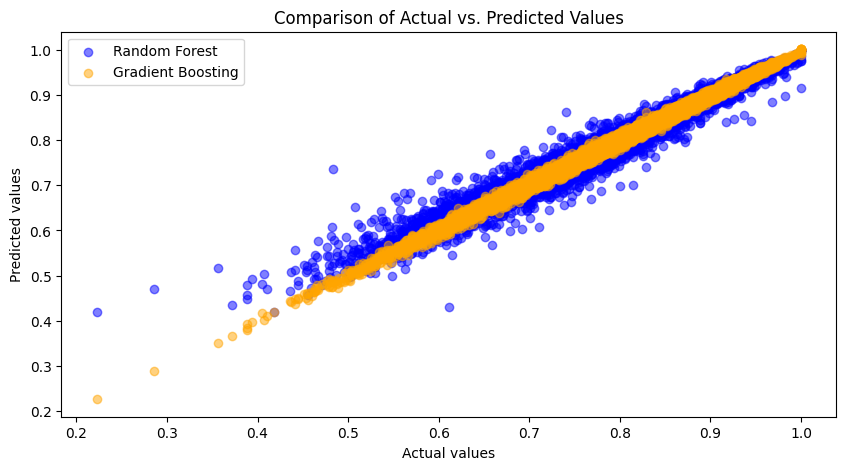

In [21]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest', alpha=0.5)
plt.scatter(y_test, gb_predictions, color='orange', label='Gradient Boosting', alpha=0.5)
plt.title('Comparison of Actual vs. Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()


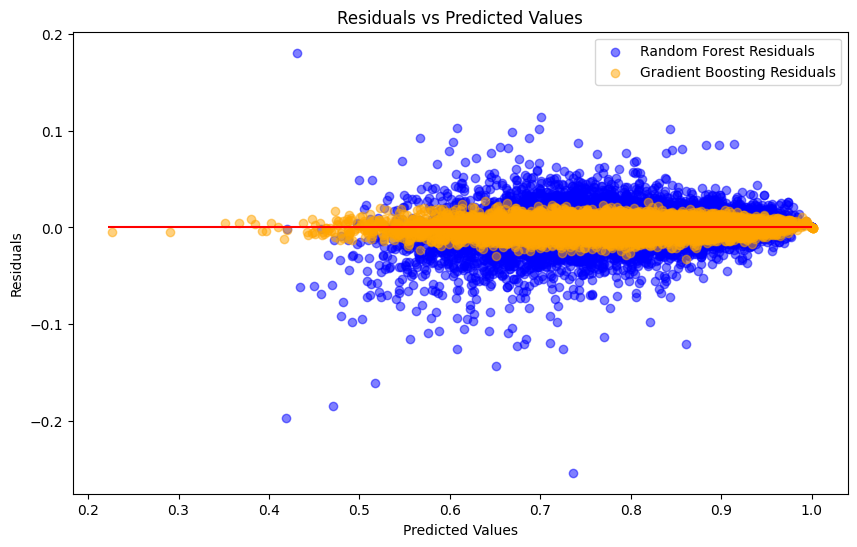

In [22]:
import matplotlib.pyplot as plt

# Assuming `y_test` is your actual values and `rf_predictions`, `gb_predictions` are your predictions from Random Forest and Gradient Boosting respectively.
plt.figure(figsize=(10, 6))
plt.scatter(rf_predictions, y_test - rf_predictions, color='blue', label='Random Forest Residuals', alpha=0.5)
plt.scatter(gb_predictions, y_test - gb_predictions, color='orange', label='Gradient Boosting Residuals', alpha=0.5)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.show()

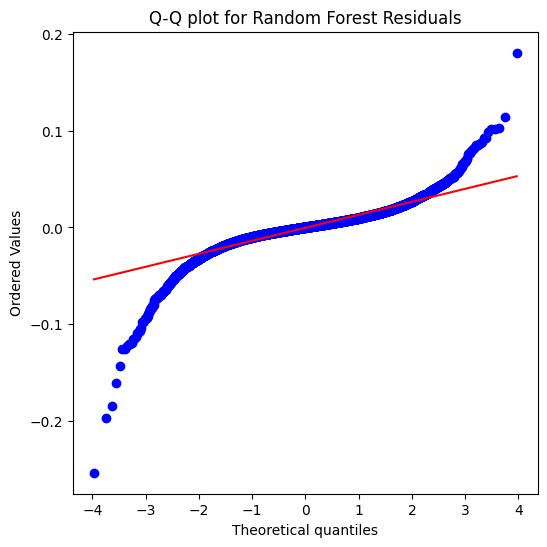

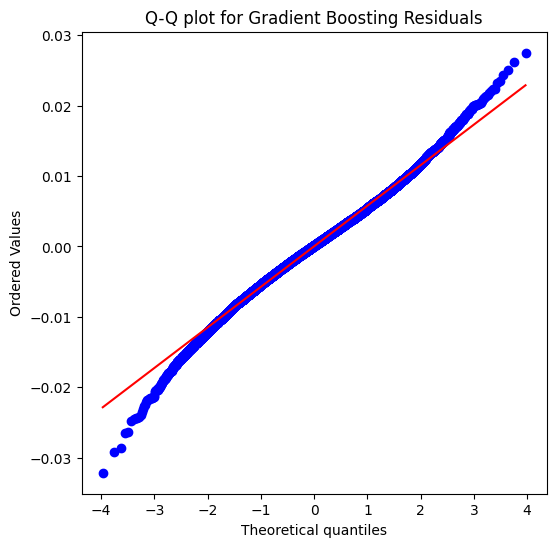

In [23]:
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(y_test - rf_predictions, dist="norm", plot=plt)
plt.title('Q-Q plot for Random Forest Residuals')
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(y_test - gb_predictions, dist="norm", plot=plt)
plt.title('Q-Q plot for Gradient Boosting Residuals')
plt.show()

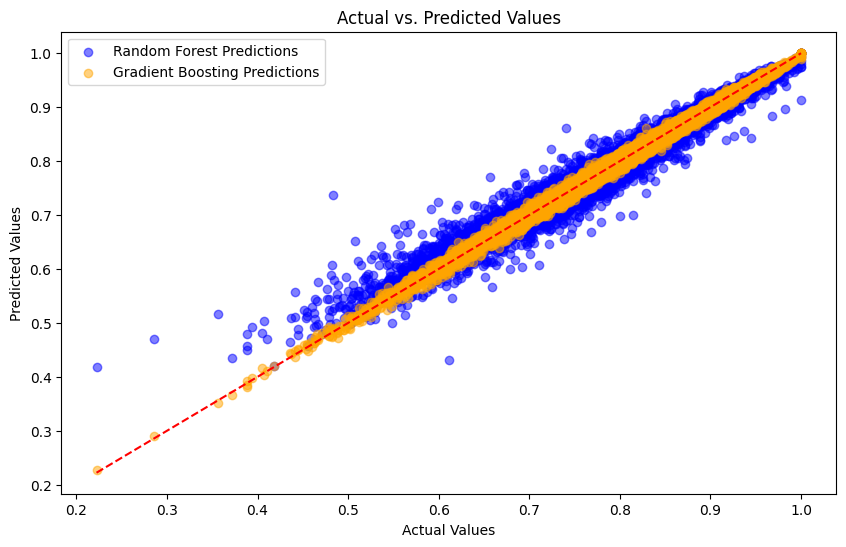

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest Predictions', alpha=0.5)
plt.scatter(y_test, gb_predictions, color='orange', label='Gradient Boosting Predictions', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

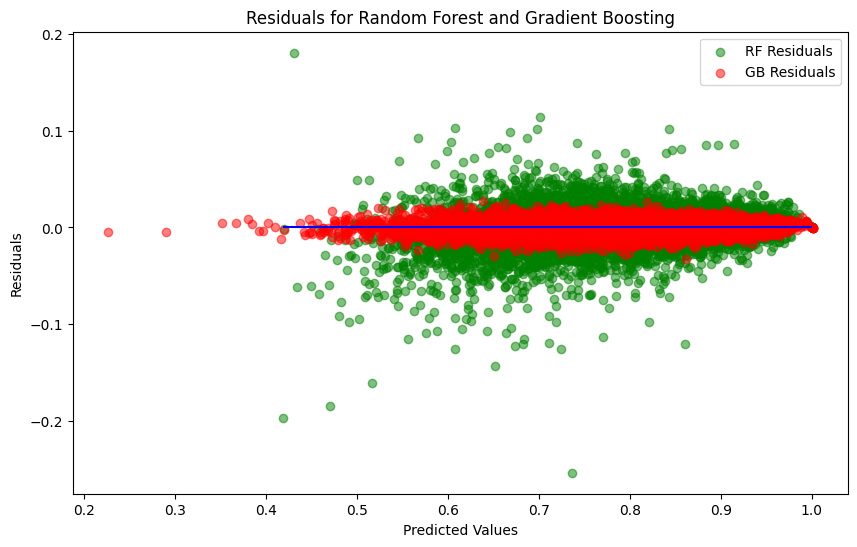

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(rf_predictions, y_test - rf_predictions, color='green', label='RF Residuals', alpha=0.5)
plt.scatter(gb_predictions, y_test - gb_predictions, color='red', label='GB Residuals', alpha=0.5)
plt.hlines(y=0, xmin=min(rf_predictions), xmax=max(rf_predictions), color='blue')
plt.title('Residuals for Random Forest and Gradient Boosting')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


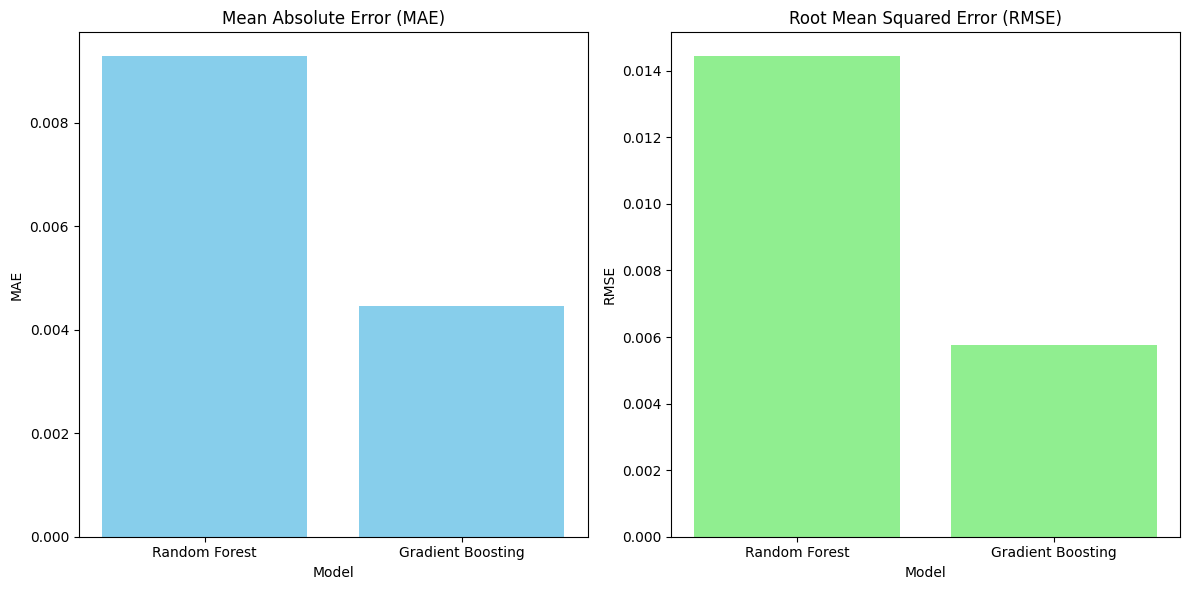

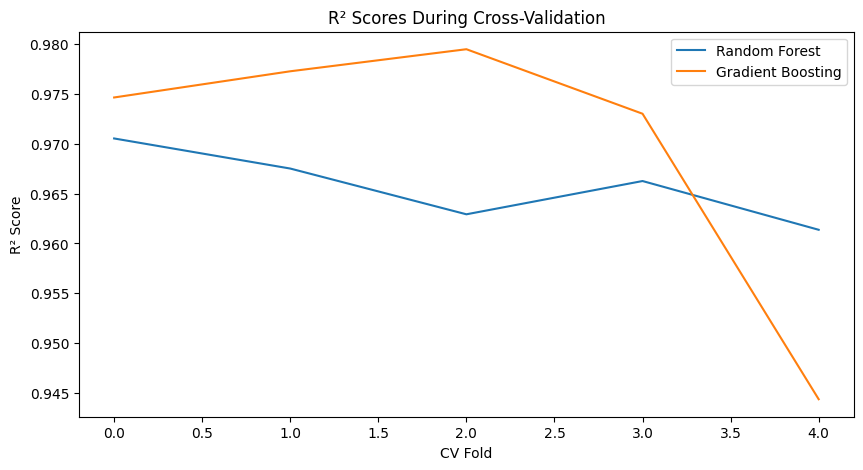

ValueError: All arrays must be of the same length

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Data preparation
models = ['Random Forest', 'Gradient Boosting']
mae = [0.009279765915062205, 0.004456091027155167]
rmse = [0.014433045081385406, 0.0057722625534197426]
r2 = [0.9714089866443817, 0.9954269519361709]
cv_r2_means = [0.9657260820187211, 0.969764489522225]

# Bar Chart for MAE and RMSE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(models, mae, color='skyblue')
ax[0].set_title('Mean Absolute Error (MAE)')
ax[0].set_ylabel('MAE')
ax[1].bar(models, rmse, color='lightgreen')
ax[1].set_title('Root Mean Squared Error (RMSE)')
ax[1].set_ylabel('RMSE')
for i in range(2):
    ax[i].set_xlabel('Model')
plt.tight_layout()
plt.show()

# Line Graph for R² Scores during Cross-Validation
cv_r2_scores = {
    'Random Forest': [0.97054017, 0.96752043, 0.96292825, 0.96626715, 0.96137442],
    'Gradient Boosting': [0.97465354, 0.97728255, 0.97949663, 0.97302115, 0.94436858]
}

plt.figure(figsize=(10, 5))
for model, scores in cv_r2_scores.items():
    plt.plot(scores, label=model)
plt.title('R² Scores During Cross-Validation')
plt.xlabel('CV Fold')
plt.ylabel('R² Score')
plt.legend()
plt.show()

# Summary Table
data_metrics = {
    'Model': models * 2,
    'Metric': ['MAE', 'RMSE', 'R²', 'CV R² Mean'] * 2,
    'Value': mae + rmse + r2 + cv_r2_means
}
df = pd.DataFrame(data_metrics)
pivot_table = df.pivot("Metric", "Model", "Value")
print(pivot_table)


In [ ]:
import pandas as pd

# Data preparation
models = ['Random Forest', 'Gradient Boosting'] * 4  # Repeating for each metric
metrics = ['MAE', 'RMSE', 'R²', 'CV R² Mean'] * 2  # Repeating metrics for each model

# Values for each metric for each model
values = [
    0.009279765915062205, 0.004456091027155167,  # MAE values for RF and GB
    0.014433045081385406, 0.0057722625534197426, # RMSE values for RF and GB
    0.9714089866443817, 0.9954269519361709,      # R² values for RF and GB
    0.9657260820187211, 0.969764489522225        # CV R² Mean values for RF and GB
]

# Creating DataFrame
data = {
    'Model': models,
    'Metric': metrics,
    'Value': values
}
df = pd.DataFrame(data)

# Creating a pivot table for better visualization
pivot_table = df.pivot(index='Metric', columns='Model', values='Value')
print(pivot_table)


ValueError: Index contains duplicate entries, cannot reshape

In [34]:
print(data.head())

  Audit Year Organisation Code  HbA1c Target Achieved  Total HbA1c Tests  \
0    2022_23               QE1                  98370             106335   
1    2022_23               QF7                  83880              88110   
2    2022_23               QGH                  44485              47135   
3    2022_23               QH8                  60835              66145   
4    2022_23               QHG                  58810              63090   

   Blood Pressure Target Achieved  Total Blood Pressure Tests  \
0                           98395                      106320   
1                           83345                       88085   
2                           44155                       47130   
3                           60620                       66100   
4                           58365                       63055   

   Cholesterol Target Achieved  Total Cholesterol Tests  \
0                        93585                   106320   
1                        80105    

<ipython-input-32-9aba8989ffc4>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='HbA1c Achievement Ratio', hue='Organisation Code', common_norm=False, fill=True, alpha=0.5)


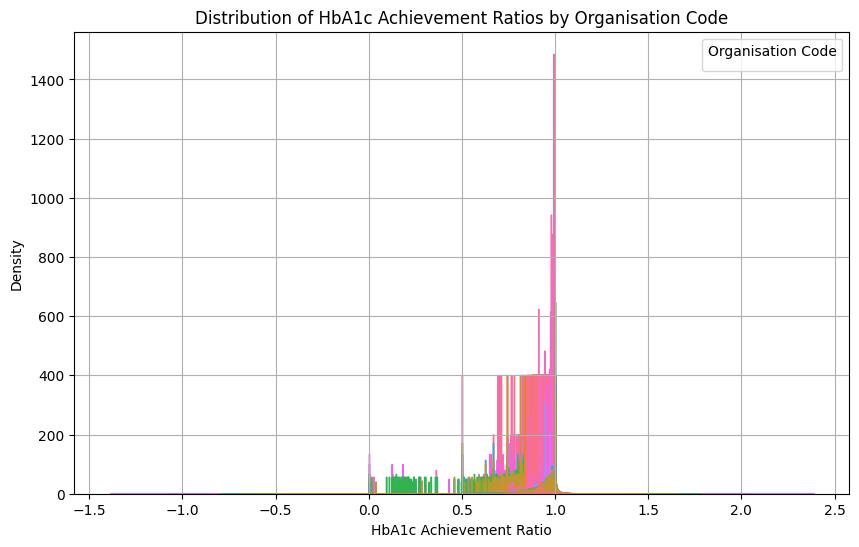

In [32]:
# Normalize the HbA1c achievement by total tests to get a ratio
data['HbA1c Achievement Ratio'] = data['HbA1c Target Achieved'] / data['Total HbA1c Tests']

# Plotting the distribution of HbA1c Achievement Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='HbA1c Achievement Ratio', hue='Organisation Code', element="step", stat="density", common_norm=False)
sns.kdeplot(data=data, x='HbA1c Achievement Ratio', hue='Organisation Code', common_norm=False, fill=True, alpha=0.5)

plt.title('Distribution of HbA1c Achievement Ratios by Organisation Code')
plt.xlabel('HbA1c Achievement Ratio')
plt.ylabel('Density')
plt.legend(title='Organisation Code')
plt.grid(True)
plt.show()

In [33]:
# Load the dataset
registrationtype2_data = pd.read_csv('/content/Type2_Registration_23.csv')

<ipython-input-33-0071d4705d95>:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  registrationtype2_data = pd.read_csv('/content/Type2_Registration_23.csv')


In [35]:
print(registrationtype2_data.head())

  Audit Year Organisation Code Type 2 Diabieties Registrations (number)  \
0    2022_23           England                                  3436315   
1    2022_23               QE1                                   106335   
2    2022_23               QF7                                    88110   
3    2022_23               QGH                                    47135   
4    2022_23               QH8                                    66145   

  Percentage of  Type 1 Diabeties in Aged \nunder 40  \
0                                                4.4   
1                                                3.9   
2                                                4.7   
3                                                3.0   
4                                                3.6   

  Percentage of Type 1 Diabieties in Aged \n40 to 64  \
0                                               44.0   
1                                               42.4   
2                                           

In [36]:
# Melting the data to make it suitable for seaborn's histogram and density plots
melted_data = registrationtype2_data.melt(id_vars=['Audit Year', 'Organisation Code'], value_vars=[
    'Percentage of Type 1 Diabeties in Aged under 40',
    'Percentage of Type 1 Diabeties in Aged 40 to 64',
    'Percentage of Type 1 Diabeties in Aged 65 to 79',
    'Percentage of Type 1 Diabeties in Aged 80 and over'
], var_name='Age Group', value_name='Percentage')

# Plotting the distribution of diabetes percentages by age group
plt.figure(figsize=(12, 6))
sns.histplot(data=melted_data, x='Percentage', hue='Age Group', element="step", stat="density", common_norm=False)
sns.kdeplot(data=melted_data, x='Percentage', hue='Age Group', common_norm=False, fill=True, alpha=0.5)

plt.title('Distribution of Type 1 Diabetes by Age Group')
plt.xlabel('Percentage of Type 1 Diabetes')
plt.ylabel('Density')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

KeyError: "The following 'value_vars' are not present in the DataFrame: ['Percentage of Type 1 Diabeties in Aged 40 to 64', 'Percentage of Type 1 Diabeties in Aged 65 to 79', 'Percentage of Type 1 Diabeties in Aged 80 and over', 'Percentage of Type 1 Diabeties in Aged under 40']"

In [38]:
# Assuming your data is loaded into a DataFrame named registrationtype2_data
print(registrationtype2_data.columns)

Index(['Audit Year', 'Organisation Code',
       'Type 2 Diabieties Registrations (number)',
       'Percentage of  Type 1 Diabeties in Aged \nunder 40',
       'Percentage of Type 1 Diabieties in Aged \n40 to 64',
       'Percentage of Type 1 Diabeties in Aged \n65 to 79',
       'Percentage of Type 1 Diabieties in Aged \n80 and over',
       'Percentage of Type 1 Diabieties Age unknown',
       'Percentage of Type 1 Diabieties in Male',
       'Percentage of Type 1 Diabeties in Female',
       'Percentage of Type 1 Diabeties Sex unknown',
       'Percentage of Type 1 Diabeties in IMD most deprived',
       'Percentage of Type 1 Diabeties in IMD 2nd most deprived',
       'Percentage of Type 1 Diabeties in IMD 3rd most deprived',
       'Percentage of Type 1 Diabeties in IMD 2nd least deprived',
       'Percentage of Type 1 Diabeties in IMD least deprived',
       'Percentage of Type 1 Diabeties IMD unknown',
       'Percentage of Type 1 Diabeties in White People',
       'Percentage 

In [39]:
# Clean up column names
registrationtype2_data.columns = registrationtype2_data.columns.str.replace('\n', ' ').str.strip()

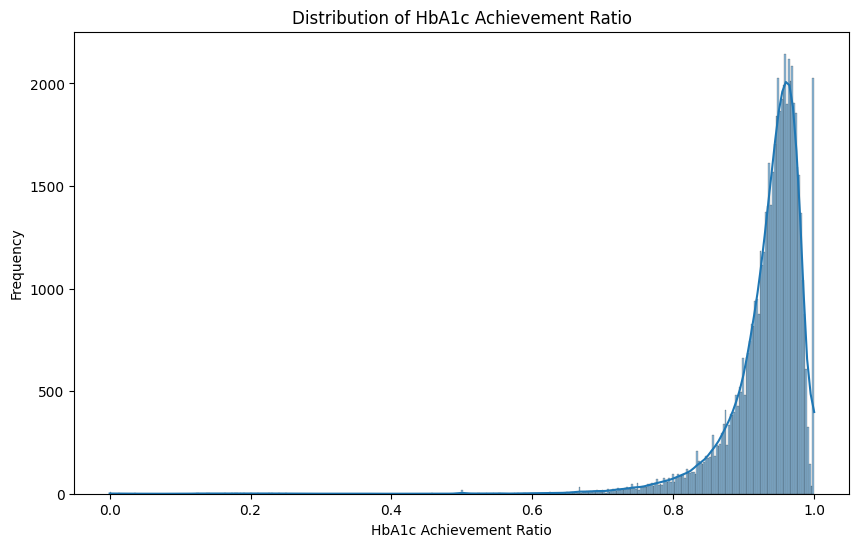

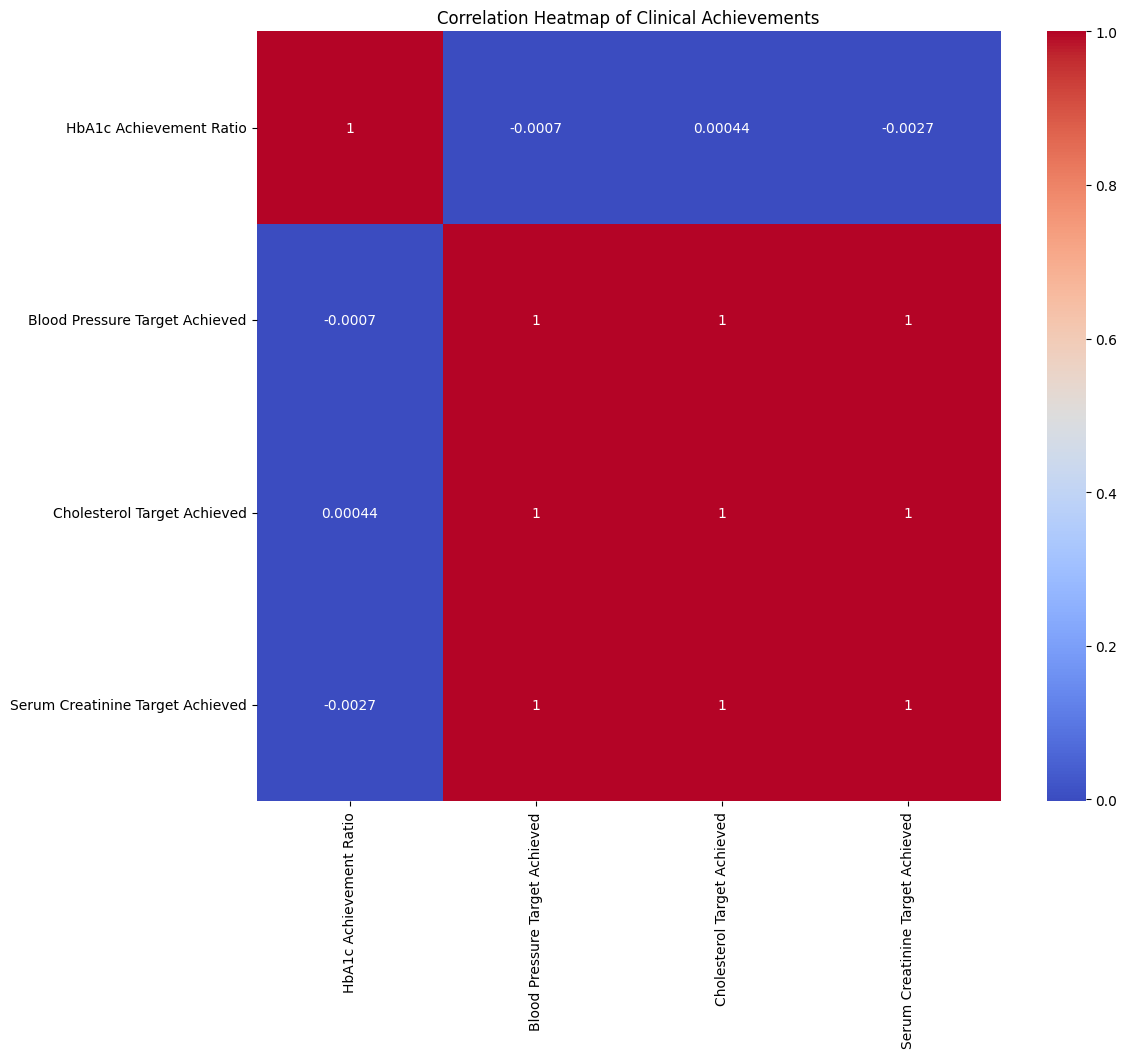

In [42]:
# Histogram of HbA1c Achievement Ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['HbA1c Achievement Ratio'], kde=True)
plt.title('Distribution of HbA1c Achievement Ratio')
plt.xlabel('HbA1c Achievement Ratio')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data[['HbA1c Achievement Ratio', 'Blood Pressure Target Achieved', 'Cholesterol Target Achieved', 'Serum Creatinine Target Achieved']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Clinical Achievements')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7e93b283d000> (for post_execute):


KeyboardInterrupt: 

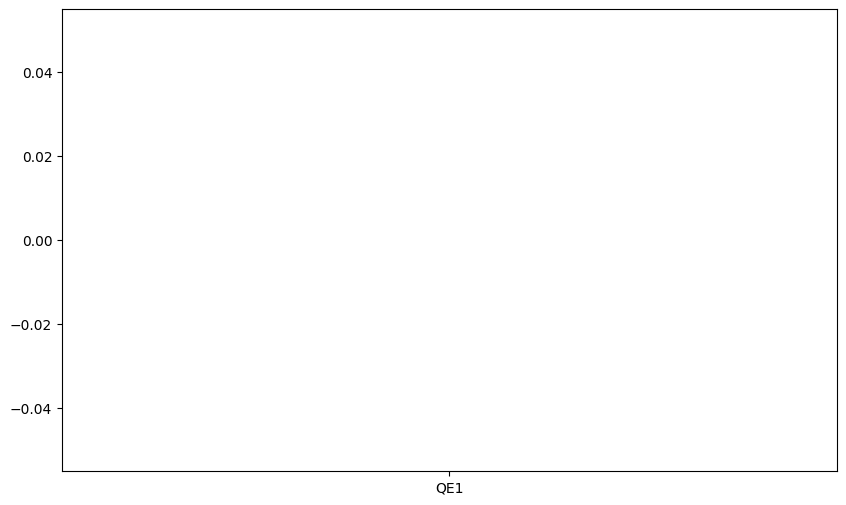

In [43]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Organisation Code', y='HbA1c Achievement Ratio', data=data)
plt.title('Violin Plot of HbA1c Achievement Ratio by Organisation')
plt.xlabel('Organisation Code')
plt.ylabel('HbA1c Achievement Ratio')
plt.show()

# Faceted Grid Plot
g = sns.FacetGrid(data, col='Audit Year', hue='Gender', height=4, aspect=1.5)
g = g.map(plt.hist, 'Blood Pressure Target Achieved').add_legend()
plt.show()

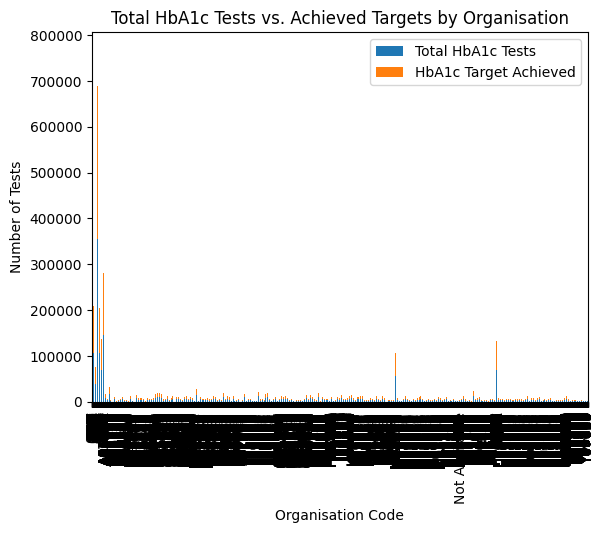

In [44]:
data.groupby(['Organisation Code']).agg({
    'Total HbA1c Tests': 'sum',
    'HbA1c Target Achieved': 'sum'
}).plot(kind='bar', stacked=True)
plt.title('Total HbA1c Tests vs. Achieved Targets by Organisation')
plt.xlabel('Organisation Code')
plt.ylabel('Number of Tests')
plt.show()


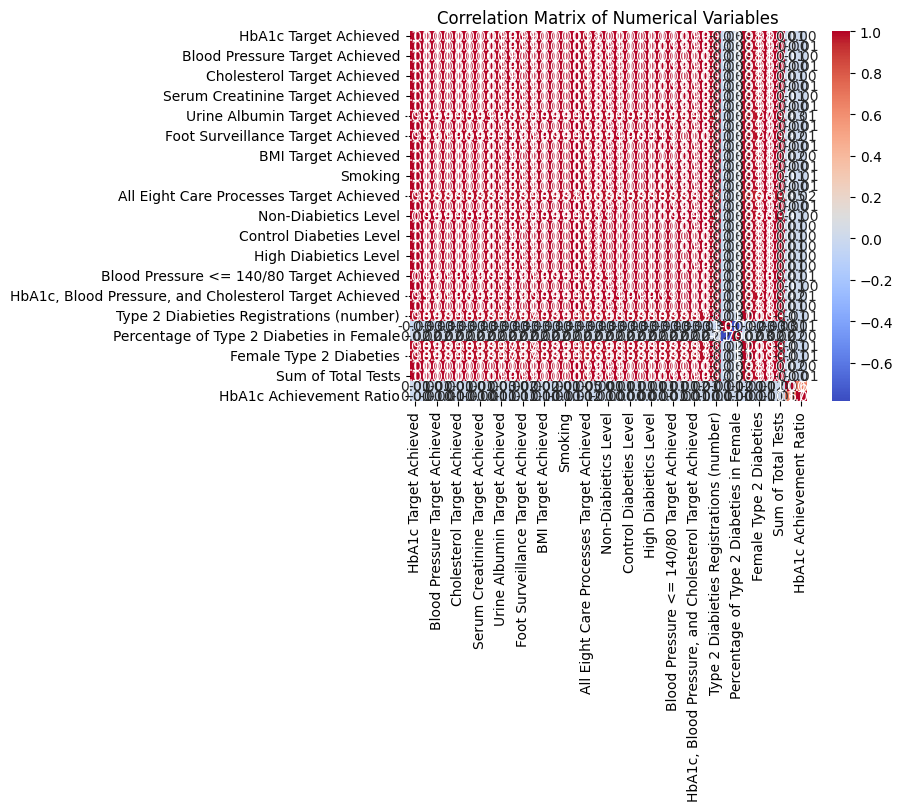

In [45]:
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


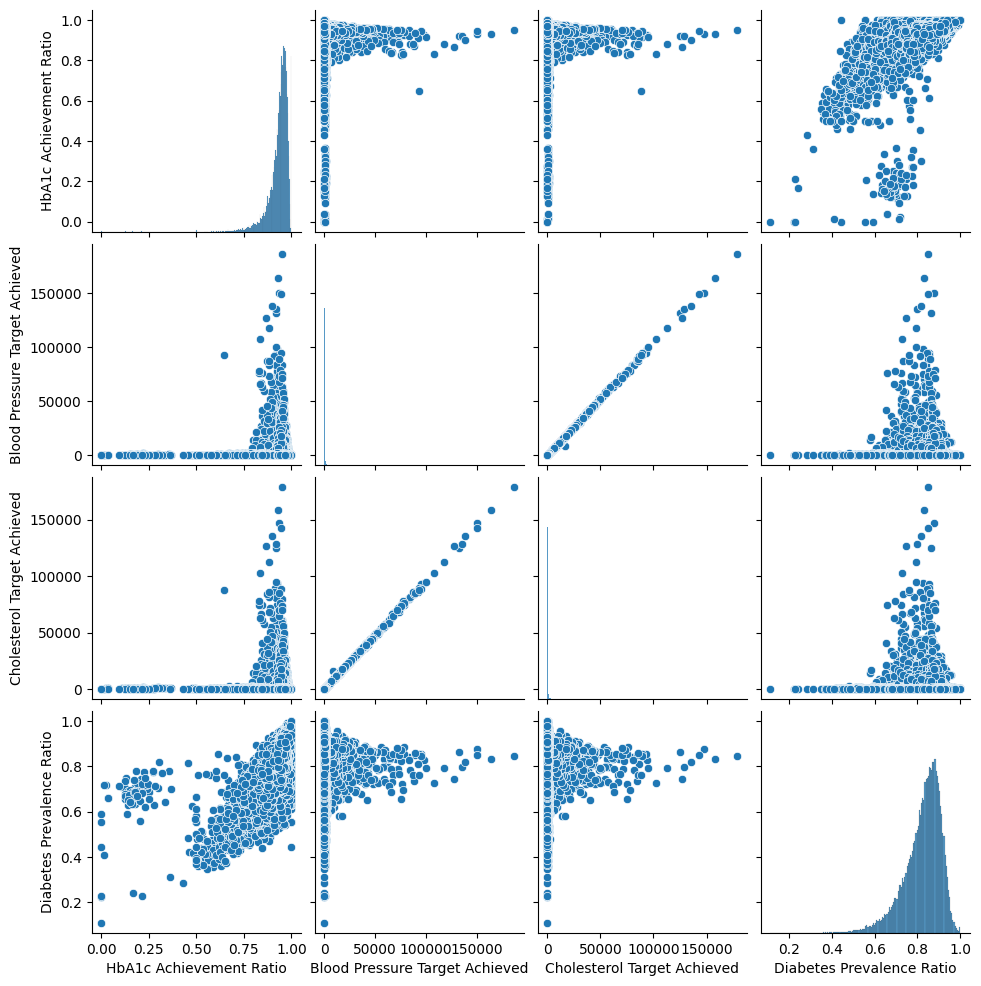

In [46]:
sns.pairplot(data[['HbA1c Achievement Ratio', 'Blood Pressure Target Achieved', 'Cholesterol Target Achieved', 'Diabetes Prevalence Ratio']])
plt.show()


In [48]:
age_groups = registrationtype2_data.groupby('Percentage of Type 1 Diabeties in Aged under 40').size()
age_groups.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Type 1 Diabetes in Aged under 40')
plt.ylabel('')
plt.show()


KeyError: 'Percentage of Type 1 Diabeties in Aged under 40'

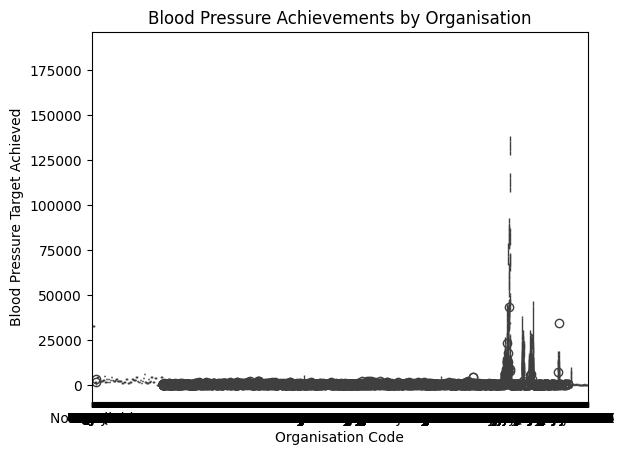

In [49]:
sns.boxplot(x='Organisation Code', y='Blood Pressure Target Achieved', data=data)
plt.title('Blood Pressure Achievements by Organisation')
plt.xlabel('Organisation Code')
plt.ylabel('Blood Pressure Target Achieved')
plt.show()


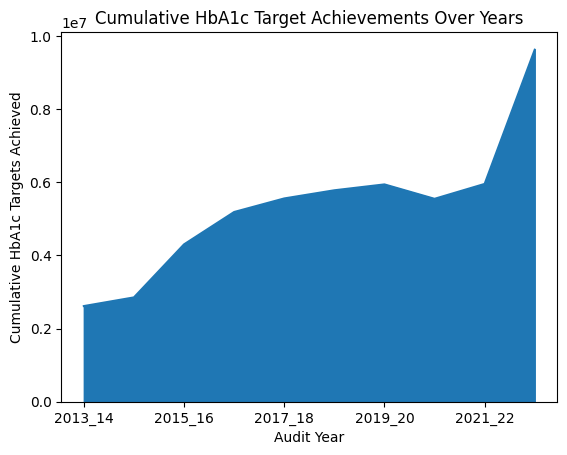

In [50]:
data.sort_values('Audit Year').groupby('Audit Year').sum()['HbA1c Target Achieved'].plot(kind='area')
plt.title('Cumulative HbA1c Target Achievements Over Years')
plt.xlabel('Audit Year')
plt.ylabel('Cumulative HbA1c Targets Achieved')
plt.show()
